In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import norm,skew

In [2]:
train=pd.read_csv("data/train.csv")
test=pd.read_csv("data/test.csv")
train_id=train.Id
test_id=test.Id
train.drop("Id",axis=1,inplace=True)
test.drop("Id",axis=1,inplace=True)

### outlier

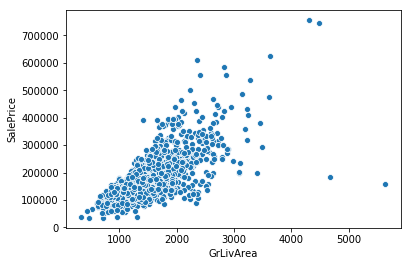

In [3]:
fig,ax=plt.subplots()
sns.scatterplot(x=train.GrLivArea,y=train.SalePrice)

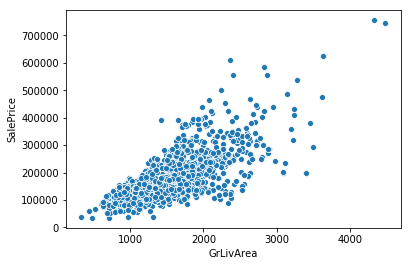

In [4]:
train=train.drop(train[(train.GrLivArea>4000)&(train.SalePrice<300000)].index)
sns.scatterplot(x=train.GrLivArea,y=train.SalePrice)

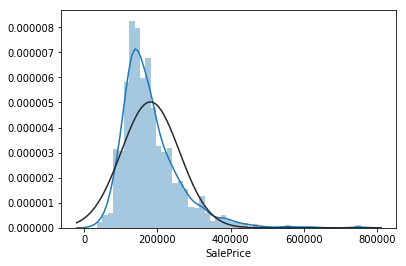

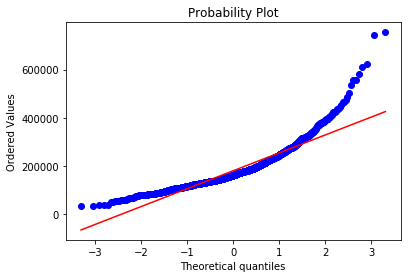

In [5]:
sns.distplot(train.SalePrice,fit=norm)
mu,sigma=norm.fit(train.SalePrice)
mu,sigma
f=plt.figure()
res=stats.probplot(train.SalePrice,plot=plt)

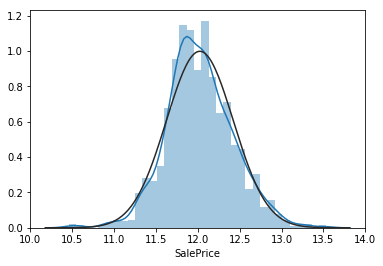

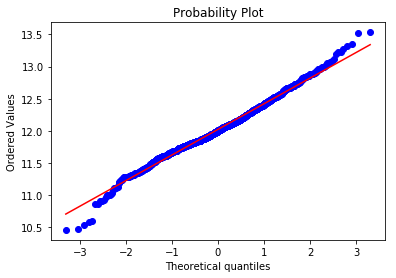

In [6]:
train.SalePrice=np.log1p(train.SalePrice)
sns.distplot(train.SalePrice,fit=norm)
mu,sigma=norm.fit(train.SalePrice)
mu,sigma
f=plt.figure()
res=stats.probplot(train.SalePrice,plot=plt)


### missing data

In [7]:
ntrain=train.shape[0]
ntest=test.shape[0]
y_train=train.SalePrice
all_data=pd.concat((train,test)).reset_index(drop=True)
all_data.drop(["SalePrice"],axis=1,inplace=True)

c:\python\python36\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [8]:
all_data_na=all_data.isnull().sum()/all_data.shape[0]*100
all_data_na=all_data_na[all_data_na>0].sort_values(ascending=False)
all_data_na

PoolQC          99.691464
MiscFeature     96.400411
Alley           93.212204
Fence           80.425094
FireplaceQu     48.680151
LotFrontage     16.660953
GarageQual       5.450806
GarageCond       5.450806
GarageFinish     5.450806
GarageYrBlt      5.450806
GarageType       5.382242
BsmtExposure     2.811107
BsmtCond         2.811107
BsmtQual         2.776826
BsmtFinType2     2.742544
BsmtFinType1     2.708262
MasVnrType       0.822763
MasVnrArea       0.788481
MSZoning         0.137127
BsmtFullBath     0.068564
BsmtHalfBath     0.068564
Utilities        0.068564
Functional       0.068564
Electrical       0.034282
BsmtUnfSF        0.034282
Exterior1st      0.034282
Exterior2nd      0.034282
TotalBsmtSF      0.034282
GarageArea       0.034282
GarageCars       0.034282
BsmtFinSF2       0.034282
BsmtFinSF1       0.034282
KitchenQual      0.034282
SaleType         0.034282
dtype: float64

In [9]:
corrmat=train.corr().SalePrice.sort_values(ascending=False)
corrmat

SalePrice        1.000000
OverallQual      0.821405
GrLivArea        0.725211
GarageCars       0.681033
GarageArea       0.656129
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
GarageYrBlt      0.541638
TotRmsAbvGrd     0.537702
Fireplaces       0.491998
MasVnrArea       0.434621
BsmtFinSF1       0.392283
LotFrontage      0.372900
WoodDeckSF       0.334251
OpenPorchSF      0.325215
2ndFlrSF         0.319953
HalfBath         0.314186
LotArea          0.260544
BsmtFullBath     0.237099
BsmtUnfSF        0.221892
BedroomAbvGr     0.209035
ScreenPorch      0.121245
PoolArea         0.074338
MoSold           0.057064
3SsnPorch        0.054914
BsmtFinSF2       0.004863
BsmtHalfBath    -0.005124
MiscVal         -0.020012
OverallCond     -0.036821
YrSold          -0.037151
LowQualFinSF    -0.037951
MSSubClass      -0.073969
KitchenAbvGr    -0.147534
EnclosedPorch   -0.149029
Name: SalePrice, dtype: float64

In [10]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

### numerical data to category

In [11]:
all_data.MSSubClass=all_data.MSSubClass.apply(str)
all_data.OverallCond=all_data.OverallCond.apply(str)
all_data.YrSold=all_data.YrSold.apply(str)
all_data.MoSold=all_data.MoSold.apply(str)

In [12]:
all_data[["MSSubClass","OverallCond","YrSold","MoSold"]].dtypes

MSSubClass     object
OverallCond    object
YrSold         object
MoSold         object
dtype: object

### Label Encoder

In [13]:
from sklearn.preprocessing import LabelEncoder
cols=('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
for c in cols:
    le = LabelEncoder()
    le.fit(list(all_data[c].values))
    all_data[c]=le.transform(list(all_data[c].values))

In [14]:
all_data[['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold']].dtypes

FireplaceQu     int64
BsmtQual        int64
BsmtCond        int64
GarageQual      int64
GarageCond      int64
ExterQual       int64
ExterCond       int64
HeatingQC       int64
PoolQC          int64
KitchenQual     int64
BsmtFinType1    int64
BsmtFinType2    int64
Functional      int64
Fence           int64
BsmtExposure    int64
GarageFinish    int64
LandSlope       int64
LotShape        int64
PavedDrive      int64
Street          int64
Alley           int64
CentralAir      int64
MSSubClass      int64
OverallCond     int64
YrSold          int64
MoSold          int64
dtype: object

### skewed data

In [15]:
numeric_feats=all_data.dtypes[all_data.dtypes!="object"].index
skewed_feats=all_data[numeric_feats].apply(lambda x:skew(x.dropna())).sort_values(ascending=False)
skewness=pd.DataFrame({"skew":skewed_feats})


In [16]:
skewness

,skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [17]:
skewness=skewness[abs(skewness)>0.75]
from scipy.special import boxcox1p
skewed_features=skewness.index
lam=0.15
for feat in skewed_features:
    all_data[feat]=boxcox1p(all_data[feat],lam)

In [18]:
all_data=pd.get_dummies(all_data)
train=all_data[:ntrain]
test=all_data[ntrain:]

### modelling

In [19]:
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [20]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

### base model

In [21]:
lasso=make_pipeline(RobustScaler(),Lasso(alpha=0.0005,random_state=1))
ENet=make_pipeline(RobustScaler(),ElasticNet(alpha=0.0005,l1_ratio=.9,random_state=3))
KRR=KernelRidge(alpha=0.6, kernel="polynomial",degree=2,coef0=2.5)

In [22]:
GBoost=GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                max_depth=4,max_features="sqrt",
                                min_samples_leaf=15,min_samples_split=10,
                                loss="huber",random_state=5)

In [23]:
model_xgb=xgb.XGBRegressor(colsample_bytree=0.4603,gamma=0.0468,
                           learning_rate=0.05,max_depth=3,
                           min_child_weight=1.7817,n_estimators=2200,
                           reg_alpha=0.4640,reg_lambda=0.8571,
                           subsample=0.5213,silent=1,
                           random_state=7,nthread=-1)

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [24]:
model_lgb=lgb.LGBMRegressor(objective="regression",num_leaves=5,
                           learning_rate=0.05, n_estimators=720,
                           max_bin=55, bagging_fraction=0.8,
                            bagging_freq=5,feature_fraction=0.2319,
                            bagging_fraction_seed=9,bagging_seed=9,
                            min_data_in_leaf=6,min_sum_hessian_in_leaf=11)

### base models scores

In [25]:
score=rmsle_cv(lasso)
score.mean(),score.std()

(0.11257195529333368, 0.007525215494982525)

In [26]:
score=rmsle_cv(ENet)
score.mean(),score.std()

(0.1125601913755637, 0.007643278836875638)

In [27]:
score=rmsle_cv(KRR)
score.mean(),score.std()

(0.11513455814111384, 0.0074249613711433625)

In [28]:
score=rmsle_cv(GBoost)
score.mean(),score.std()

(0.11623827309847182, 0.0069295516231920465)

In [29]:
score=rmsle_cv(model_xgb)
score.mean(),score.std()

c:\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


(0.1164557925475399, 0.005964352703658248)

In [30]:
score=rmsle_cv(model_lgb)
score.mean(),score.std()

(0.11642576561931642, 0.007418289971401769)

### stacking model

#### averaged base models

In [31]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [32]:
averaged_models=AveragingModels(models=(ENet,GBoost,KRR,lasso))
score=rmsle_cv(averaged_models)
score.mean(),score.std()

(0.10877126522117483, 0.007392122711479957)

In [84]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y.values[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [85]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)
score = rmsle_cv(stacked_averaged_models)
score.mean(),score.std()

(0.10817046378513569, 0.007365325641374276)

### Ensembling stackedRegressor,XGBoost and LightGBM

In [53]:
def rmsle(y,y_pred):
    return np.sqrt(mean_squared_error(y,y_pred))

(219,)

In [86]:
stacked_averaged_models.fit(train.values,y_train)
stacked_train_pre=stacked_averaged_models.predict(train.values)
stacked_test_pre=stacked_averaged_models.predict(test.values)
rmsle(stacked_train_pre,y_train)

0.07920442927498125

In [88]:
model_xgb.fit(train,y_train)
xgb_train_pre=model_xgb.predict(train)
xgb_test_pre=model_xgb.predict(test)
rmsle(xgb_train_pre,y_train)

c:\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\python\python36\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


0.07978329855632173

In [89]:
model_lgb.fit(train,y_train)
lgb_train_pre=model_lgb.predict(train)
lgb_test_pre=model_lgb.predict(test)
rmsle(y_train,lgb_train_pre)

0.07274378363377658

In [90]:
ensemble=stacked_test_pre*0.7+xgb_test_pre*0.15+lgb_test_pre*0.15

In [92]:
ensemble=np.expm1(ensemble)

In [93]:
ensemble

array([120173.44968124, 159341.45644534, 185243.59244981, ...,
       169057.06317117, 117515.48901833, 221278.37766043])

In [94]:
sub=pd.DataFrame()
sub["Id"]=test_id
sub["SalePrice"]=ensemble
from datetime import datetime
now=datetime.now()
sub.to_csv("data/{0:02d}{1:02d}{2:02d}{3:02d}_ensemble_submission.csv".format(now.year,now.month,now.day,now.hour),index=False)

In [95]:
623
jinsoo5381
jinsoo5381novice tier
0.11527
5
~10s
Your Best Entry 
You advanced 270 places on the leaderboard!

Your submission scored 0.11527, which is an improvement of your previous score of 0.11586. Great job!

SyntaxError: invalid syntax (<ipython-input-95-a8d24216b55a>, line 3)

In [129]:
623/5445

0.11441689623507806

In [130]:
x= np.arange(-10,10,0.1)
y=x**3-50
    

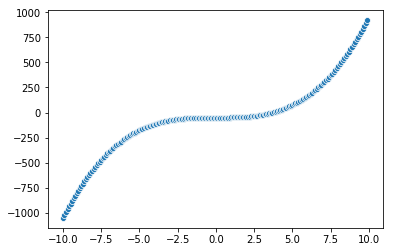

In [131]:
sns.scatterplot(x=x,y=y)